# HW#5 Convolutional Neural Network

안녕하세요, 광운대학교 로봇학부의 오정현 교수입니다. 본 자료는 딥러닝 실습 수업을 위해 제작된 것입니다.

파이썬 문법
- 점프투파이썬(https://wikidocs.net/book/1) 참고

이번 과제는 Convolutional Neural Network를 이용하여 Classification을 해보는 것입니다.





#1. CNN Classification
지난 주에는 Multi-layer Neural Network를 이용하여 이미지를 분류하였습니다. CNN은 이미지 처리에 있어서 일반적인 Neural Network보다 높은 성능을 나타냅니다. 

지난 예제 (https://www.tensorflow.org/tutorials/keras/classification?hl=ko)에서 구현하였던 것처럼 fashion_mnist 분류기를 CNN으로 설계하여 보세요. 
CNN 예제 (https://www.tensorflow.org/tutorials/images/cnn)를 참고하셔도 됩니다.

다양한 layer 개수, node 개수 등 모델의 parameter를 바꿔서 보다 높은 분류 성능이 나오도록 네트워크를 바꿔보세요. 

기존 NN에 비하여 성능이 높게 나오나요?


# **Data Loader & Preprocessing**
EDA는 생략(HW4참조)

In [2]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random

import tensorflow as tf
%matplotlib inline
sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
tf.__version__

'2.2.0-rc4'

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
# data loader
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
X_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

In [6]:
X_test.shape, y_test.shape

((10000, 28, 28, 1), (10000,))

In [0]:
# Pixel값을 normalization하여 0~1로 하기위해 scaling
X_train = X_train / 255.0

X_test = X_test / 255.0


In [0]:
batch_size = 512
learning_rate = 0.01
epochs = 100

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


Using TensorFlow backend.


In [0]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

reduceLR = ReduceLROnPlateau( 
    monitor='val_accuracy',  # 모니터 기준 설정 val_loss? val_acc?
    factor=0.5,          # callback 호출시 학습률을 1/2로 줄인다
    patience=15,         # epoch 10 동안 개선되지 않으면 callback이 호출
)

filename = './mymodel.h5'.format(epochs, batch_size)
checkpoint = ModelCheckpoint(filename,             # file명을 지정
                             monitor='val_accuracy',   # val_accuracy 값이 개선되었을때 호출
                             verbose=1,            # 로그를 출력
                             save_best_only=True,  # best 값만 저장
                             mode='auto'           # auto는 알아서 best를 찾는다. min/max
                            )

earlystopping = EarlyStopping(monitor='val_accuracy',  # 모니터 기준 설정 (val acc) 
                              patience=15,         # 10회 Epoch동안 개선되지 않는다면 종료
                             )

## **model_1**

In [0]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

  tf.keras.layers.Conv2D(64, (3,3), 
                         activation ='relu'),

  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation = "relu"),
  tf.keras.layers.Dense(10, activation='softmax')

])

model_1.compile(optimizer="Adam" ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_1.summary()
                            

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 61952)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                3964992   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 4,058,314
Trainable params: 4,058,314
Non-trainable params: 0
______________________________________________

In [0]:
history_1 = model_1.fit(X_train, y_train, 
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose = 2,
                        validation_split = 0.2,
                        callbacks=[checkpoint, earlystopping,reduceLR])
                        

Epoch 1/100

Epoch 00001: val_accuracy improved from -inf to 0.84925, saving model to ./mymodel.h5
94/94 - 7s - loss: 0.5969 - accuracy: 0.7882 - val_loss: 0.4127 - val_accuracy: 0.8493 - lr: 0.0010
Epoch 2/100

Epoch 00002: val_accuracy improved from 0.84925 to 0.88483, saving model to ./mymodel.h5
94/94 - 6s - loss: 0.3363 - accuracy: 0.8798 - val_loss: 0.3197 - val_accuracy: 0.8848 - lr: 0.0010
Epoch 3/100

Epoch 00003: val_accuracy improved from 0.88483 to 0.89892, saving model to ./mymodel.h5
94/94 - 6s - loss: 0.2752 - accuracy: 0.9007 - val_loss: 0.2770 - val_accuracy: 0.8989 - lr: 0.0010
Epoch 4/100

Epoch 00004: val_accuracy improved from 0.89892 to 0.90500, saving model to ./mymodel.h5
94/94 - 6s - loss: 0.2364 - accuracy: 0.9139 - val_loss: 0.2635 - val_accuracy: 0.9050 - lr: 0.0010
Epoch 5/100

Epoch 00005: val_accuracy improved from 0.90500 to 0.91183, saving model to ./mymodel.h5
94/94 - 6s - loss: 0.2001 - accuracy: 0.9273 - val_loss: 0.2462 - val_accuracy: 0.9118 - lr: 

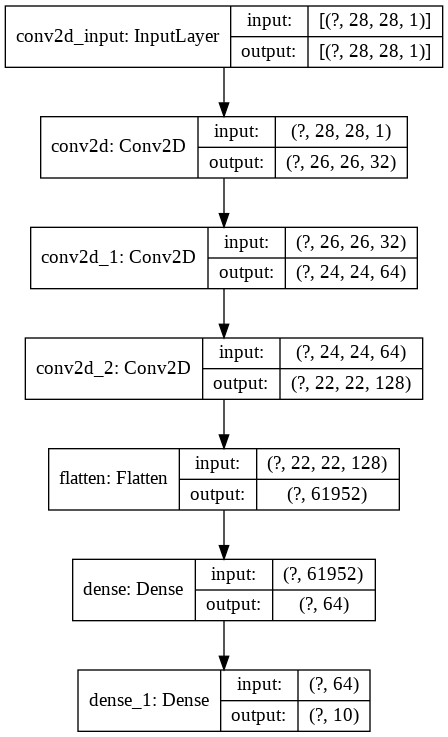

In [0]:
from tensorflow.keras.utils import plot_model

plot_model(model_1, to_file = 'model_1.png', show_shapes = True, show_layer_names = True)

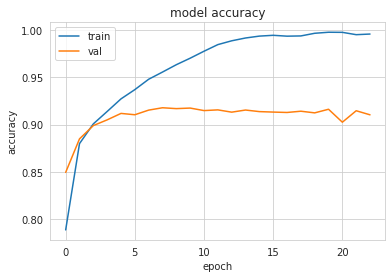

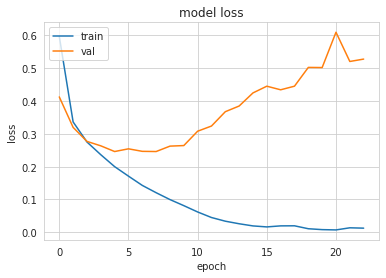

In [0]:
import matplotlib.pyplot as plt

plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
test_loss_1, test_acc_1 = model_1.evaluate(X_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.5412 - accuracy: 0.9103


In [0]:
print(test_acc_1)

0.9103000164031982


# **Model_2**

In [0]:
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1),
                         activation ='relu'),
  tf.keras.layers.BatchNormalization(),    
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 
  tf.keras.layers.Dropout(0.2),


  tf.keras.layers.Conv2D(64, (3,3), 
                         activation ='relu'),
  tf.keras.layers.BatchNormalization(),    
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 
  tf.keras.layers.Dropout(0.2),



  tf.keras.layers.Conv2D(128, (3,3), 
                         activation ='relu'),
  tf.keras.layers.BatchNormalization(),    
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 
  tf.keras.layers.Dropout(0.2),


  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation = "relu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')

])

model_2.compile(optimizer="Adam" ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_2.summary()
                            

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)         

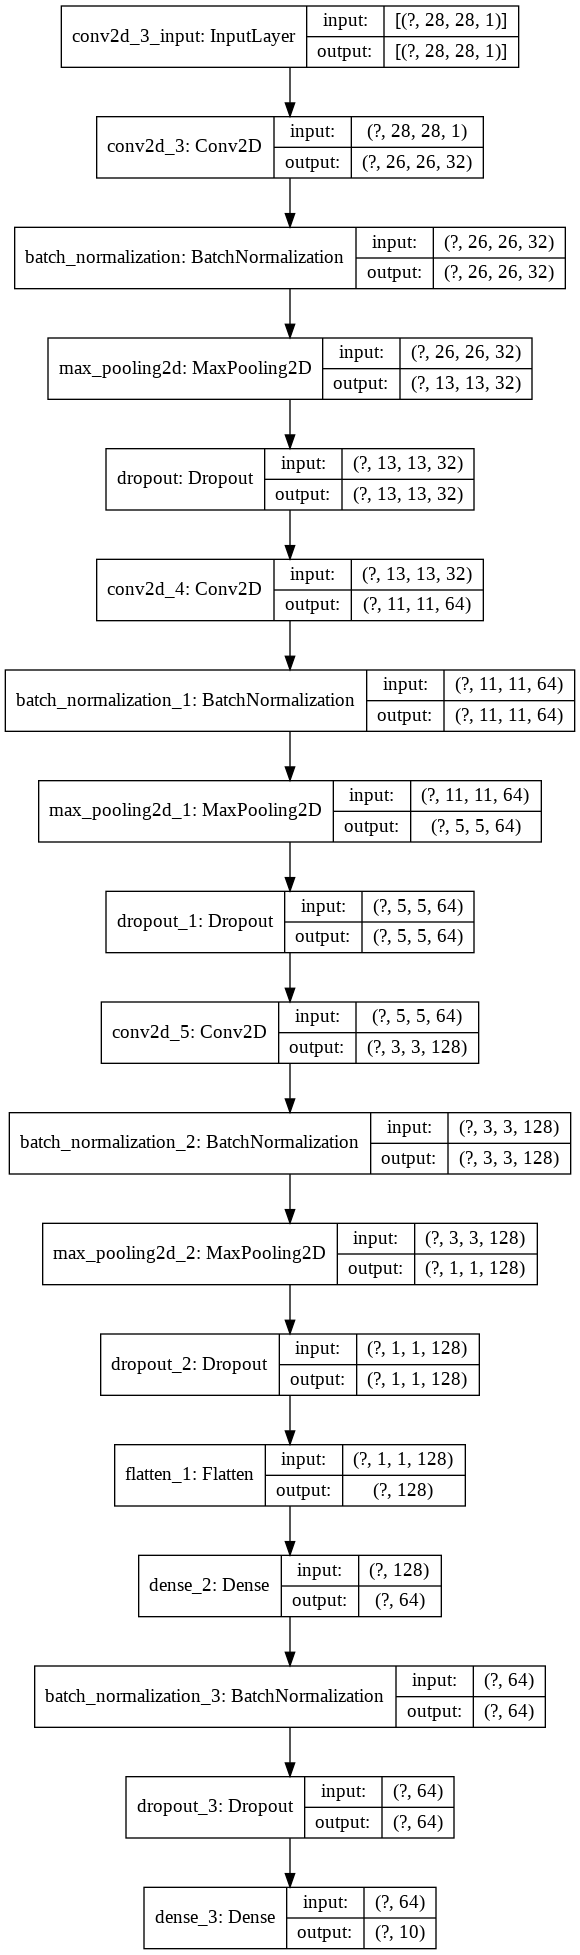

In [0]:
from tensorflow.keras.utils import plot_model

plot_model(model_2, to_file = 'model_2.png', show_shapes = True, show_layer_names = True)

In [0]:
history_2 = model_2.fit(X_train, y_train, 
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose = 2,
                        validation_split = 0.2,
                        callbacks=[checkpoint, earlystopping,reduceLR])

Epoch 1/100

Epoch 00001: val_accuracy did not improve from 0.91783
94/94 - 3s - loss: 0.8675 - accuracy: 0.7013 - val_loss: 2.2710 - val_accuracy: 0.0957 - lr: 0.0010
Epoch 2/100

Epoch 00002: val_accuracy did not improve from 0.91783
94/94 - 2s - loss: 0.5437 - accuracy: 0.8061 - val_loss: 2.0572 - val_accuracy: 0.1856 - lr: 0.0010
Epoch 3/100

Epoch 00003: val_accuracy did not improve from 0.91783
94/94 - 2s - loss: 0.4702 - accuracy: 0.8307 - val_loss: 1.6023 - val_accuracy: 0.4728 - lr: 0.0010
Epoch 4/100

Epoch 00004: val_accuracy did not improve from 0.91783
94/94 - 2s - loss: 0.4253 - accuracy: 0.8454 - val_loss: 1.1717 - val_accuracy: 0.5754 - lr: 0.0010
Epoch 5/100

Epoch 00005: val_accuracy did not improve from 0.91783
94/94 - 2s - loss: 0.3997 - accuracy: 0.8553 - val_loss: 0.6666 - val_accuracy: 0.7638 - lr: 0.0010
Epoch 6/100

Epoch 00006: val_accuracy did not improve from 0.91783
94/94 - 2s - loss: 0.3784 - accuracy: 0.8635 - val_loss: 0.4671 - val_accuracy: 0.8351 - lr:

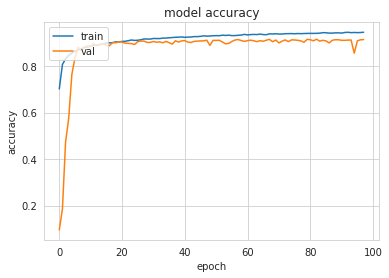

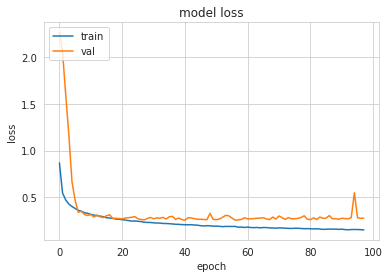

In [0]:

plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
test_loss_2, test_acc_2 = model_2.evaluate(X_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.2793 - accuracy: 0.9118


In [0]:
test_acc_2

0.9118000268936157

# **Model-GridsearchCV**
Batch normalization, activation function, Dropout, optimizer,등 하이퍼파라미터 튜닝을 위해 gridsearch를 사용합니다.
model_2와 같은 층 구조를 사용하고, 하이퍼파라미터만 조정합니다.

In [0]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import numpy
from sklearn.model_selection import GridSearchCV

def create_model(_optimizer, _lr, _batch_norm, _activation, _dropout):
	
	model = tf.keras.models.Sequential([
		tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1),
					activation =_activation),
		tf.keras.layers.BatchNormalization() if _batch_norm else '',    
		tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 
		tf.keras.layers.Dropout(_dropout),
		
		
		tf.keras.layers.Conv2D(64, (3,3), 
					activation =_activation),
		tf.keras.layers.BatchNormalization() if _batch_norm else '',    
		tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 
		tf.keras.layers.Dropout(_dropout),
		
		
		
		tf.keras.layers.Conv2D(128, (3,3), 
					activation =_activation),
		tf.keras.layers.BatchNormalization() if _batch_norm else '',    
		tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 
		tf.keras.layers.Dropout(_dropout),
		
		
		
		tf.keras.layers.Flatten(),
		tf.keras.layers.Dense(64, activation = _activation),
		tf.keras.layers.BatchNormalization() if _batch_norm else '',
		tf.keras.layers.Dropout(_dropout),
		tf.keras.layers.Dense(10, activation='softmax')])
	
	optimizer = getattr(tf.keras.optimizers, _optimizer)(learning_rate=_lr)
	
	model.compile(loss='sparse_categorical_crossentropy',
			optimizer=optimizer,
			metrics=['accuracy'])
	return model
# KerasClassifier로 모델 생성기 설정
model = KerasClassifier(build_fn=create_model, verbose=3)


In [0]:
# Grid 설정
param_grid = {
    'batch_size': [512, 1024],
    'epochs': [100],
    '_optimizer': ['RMSprop','Adam'], 
    '_lr': [1e-3, 2e-3, 1e-2], 
    '_batch_norm': [1, 0], 
    '_activation': ['relu','selu','swish'],
    '_dropout': [0.2, 0.4], 
}

In [13]:
param_grid

{'_activation': ['relu', 'selu', 'swish'],
 '_batch_norm': [1, 0],
 '_dropout': [0.2, 0.4],
 '_lr': [0.001, 0.002, 0.01],
 '_optimizer': ['RMSprop', 'Adam'],
 'batch_size': [512, 1024],
 'epochs': [100]}

In [14]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train, 
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose = 2,
                        validation_split = 0.2,
                        callbacks=[checkpoint, earlystopping,reduceLR])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.

Epoch 00001: val_accuracy did not improve from 0.91088
63/63 - 1s - loss: 1.1456 - accuracy: 0.5963 - val_loss: 2.3495 - val_accuracy: 0.0980 - lr: 0.0020
Epoch 2/100

Epoch 00002: val_accuracy did not improve from 0.91088
63/63 - 1s - loss: 0.7239 - accuracy: 0.7360 - val_loss: 2.1545 - val_accuracy: 0.1889 - lr: 0.0020
Epoch 3/100

Epoch 00003: val_accuracy did not improve from 0.91088
63/63 - 1s - loss: 0.6238 - accuracy: 0.7748 - val_loss: 2.0259 - val_accuracy: 0.2887 - lr: 0.0020
Epoch 4/100

Epoch 00004: val_accuracy did not improve from 0.91088
63/63 - 1s - loss: 0.5617 - accuracy: 0.8001 - val_loss: 1.7831 - val_accuracy: 0.4126 - lr: 0.0020
Epoch 5/100

Epoch 00005: val_accuracy did not improve from 0.91088
63/63 - 1s - loss: 0.5202 - accuracy: 0.8144 - val_loss: 1.4434 - val_accuracy: 0.4689 - lr: 0.0020
Epoch 6/100

Epoch 00006: val_accuracy did not improve from 0.91088
63/63 - 1s - loss: 0.4928 - accuracy: 0.8238 - val_loss: 0.9526 - va

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: The added layer must be an instance of class Layer. Found: 

  FitFailedWarning)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.

Epoch 00050: val_accuracy did not improve from 0.91088
63/63 - 1s - loss: 0.3222 - accuracy: 0.8827 - val_loss: 0.2933 - val_accuracy: 0.8920 - lr: 0.0020
Epoch 1/100

Epoch 00001: val_accuracy did not improve from 0.91088
63/63 - 1s - loss: 1.1848 - accuracy: 0.5903 - val_loss: 2.5107 - val_accuracy: 0.0980 - lr: 0.0020
Epoch 2/100

Epoch 00002: val_accuracy did not improve from 0.91088
63/63 - 1s - loss: 0.7348 - accuracy: 0.7366 - val_loss: 2.5552 - val_accuracy: 0.1384 - lr: 0.0020
Epoch 3/100

Epoch 00003: val_accuracy did not improve from 0.91088
63/63 - 1s - loss: 0.6459 - accuracy: 0.7679 - val_loss: 2.2734 - val_accuracy: 0.1608 - lr: 0.0020
Epoch 4/100

Epoch 00004: val_accuracy did not improve from 0.91088
63/63 - 1s - loss: 0.5874 - accuracy: 0.7904 - val_loss: 2.1191 - val_accuracy: 0.3736 - lr: 0.0020
Epoch 5/100

Epoch 00005: val_accuracy did not improve from 0.91088
63/63 - 1s - loss: 0.5530 - accuracy: 0.8057 - val_loss: 1.7482 - va

In [15]:
grid_result.best_params_

{'_activation': 'relu',
 '_batch_norm': 1,
 '_dropout': 0.2,
 '_lr': 0.001,
 '_optimizer': 'Adam',
 'batch_size': 512,
 'epochs': 100}

In [16]:
grid_result.best_score_

0.9038333296775818